查看Pipeline支援的任務類型

In [2]:
from transformers.pipelines import SUPPORTED_TASKS

In [3]:
print(SUPPORTED_TASKS.items())

dict_items([('audio-classification', {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}), ('automatic-speech-recognition', {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}), ('text-to-audio', {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'defau

In [4]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

Pipeline的建立與使用

In [5]:
from transformers import *

c:\Users\fu\anaconda3\envs\tf\lib\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
c:\Users\fu\anaconda3\envs\tf\lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
c:\Users\fu\anaconda3\envs\tf\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


根据任務類型直接建立Pipeline, 預設都是英文的模型

In [6]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at C:\Users\fu/.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english\snapshots\4643665f84c6760e3cbf6adaace6c398592270af\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",

In [7]:
pipe(["very good!", "vary bad!"])

Disabling tokenizer parallelism, we're using DataLoader multithreading already


[{'label': 'POSITIVE', 'score': 0.9998525381088257},
 {'label': 'NEGATIVE', 'score': 0.9991207718849182}]

指定任務類型，再指定模型，建立基於指定模型的Pipeline

In [8]:
# https://huggingface.co/models
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at C:\Users\fu/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vo

In [9]:
pipe("沒甚麼阻礙,繼續吧！")

[{'label': 'positive (stars 4 and 5)', 'score': 0.7482998967170715}]

预先預訓練模型，再建立Pipeline

In [10]:
# 這種方式，必须同時指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

loading configuration file config.json from cache at C:\Users\fu/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vo

In [11]:
pipe("沒甚麼阻礙,繼續吧！")

[{'label': 'positive (stars 4 and 5)', 'score': 0.7482998967170715}]

In [12]:
pipe("還是依樣,沒甚麼阻礙,繼續吧！")

[{'label': 'positive (stars 4 and 5)', 'score': 0.5869768857955933}]

In [13]:
pipe.model.device

device(type='cpu')

In [14]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("還是依樣,沒甚麼阻礙,繼續吧！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

0.05349865436553955


使用GPU進行推理

In [15]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)

loading configuration file config.json from cache at C:\Users\fu/.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vo

In [16]:
pipe.model.device

device(type='cuda', index=0)

In [17]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("還是依樣,沒甚麼阻礙,繼續吧！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

c:\Users\fu\anaconda3\envs\tf\lib\site-packages\transformers\pipelines\base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


0.05164613246917724


其他Pipeline示例

In [19]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

loading configuration file config.json from cache at C:\Users\fu/.cache\huggingface\hub\models--google--owlvit-base-patch32\snapshots\8ca8ee912aa922a57e6a89144189080ebc8e852e\config.json
text_config is None. Initializing the OwlViTTextConfig with default values.
vision_config is None. initializing the OwlViTVisionConfig with default values.
Model config OwlViTConfig {
  "_name_or_path": "google/owlvit-base-patch32",
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "projection_dim": 512,
  "text_config": {
    "bos_token_id": 0,
    "dropout": 0.0,
    "eos_token_id": 2,
    "max_length": 16,
    "model_type": "owlvit_text_model",
    "pad_token_id": 1
  },
  "text_config_dict": null,
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "vision_config": {
    "dropout": 0.0,
    "model_type": "owlvit_vision_model"
  },
  "vision_config_dict": null
}

loading configuration fi

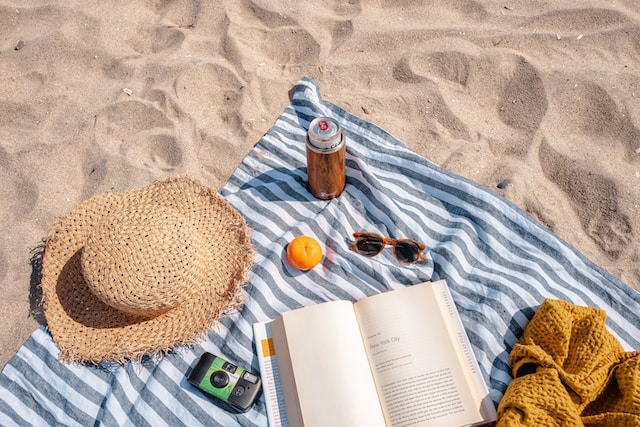

In [20]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)
im

In [21]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions

[{'score': 0.24826452136039734,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 229, 'xmax': 429, 'ymax': 264}},
 {'score': 0.15511161088943481,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 503, 'ymax': 427}},
 {'score': 0.10860671103000641,
  'label': 'hat',
  'box': {'xmin': 38, 'ymin': 173, 'xmax': 260, 'ymax': 363}}]

In [22]:
detector

In [23]:
import transformers as tfs

In [24]:
tfs.pipelines.zero_shot_object_detection.ZeroShotObjectDetectionPipeline

transformers.pipelines.zero_shot_object_detection.ZeroShotObjectDetectionPipeline